In [1]:
import pandas as pd
import numpy as np

In [2]:
data_frame = pd.read_csv('heart.csv', encoding='utf-8')
data_frame.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
from sklearn.preprocessing import LabelEncoder

def map_categorical_variable(label):
    le = LabelEncoder()
    mapped_label = le.fit_transform(data_frame[label])
    data_frame[label+'_label'] = mapped_label

In [4]:
categorical_variables = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for cv in categorical_variables:
    map_categorical_variable(cv)

data_frame.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_label,ChestPainType_label,RestingECG_label,ExerciseAngina_label,ST_Slope_label
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,1,1,0,2
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,2,1,0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,1,2,0,2
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,1,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,2,1,0,2


In [5]:
data_frame.drop(categorical_variables, axis=1, inplace=True)

data_frame.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_label,ChestPainType_label,RestingECG_label,ExerciseAngina_label,ST_Slope_label
0,40,140,289,0,172,0.0,0,1,1,1,0,2
1,49,160,180,0,156,1.0,1,0,2,1,0,1
2,37,130,283,0,98,0.0,0,1,1,2,0,2
3,48,138,214,0,108,1.5,1,0,0,1,1,1
4,54,150,195,0,122,0.0,0,1,2,1,0,2


In [8]:
data_frame.shape

(918, 12)

In [9]:
print(data_frame.groupby('HeartDisease').size())

HeartDisease
0    410
1    508
dtype: int64


In [54]:
data_frame.columns.values.tolist()

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease',
 'Sex_label',
 'ChestPainType_label',
 'RestingECG_label',
 'ExerciseAngina_label',
 'ST_Slope_label']

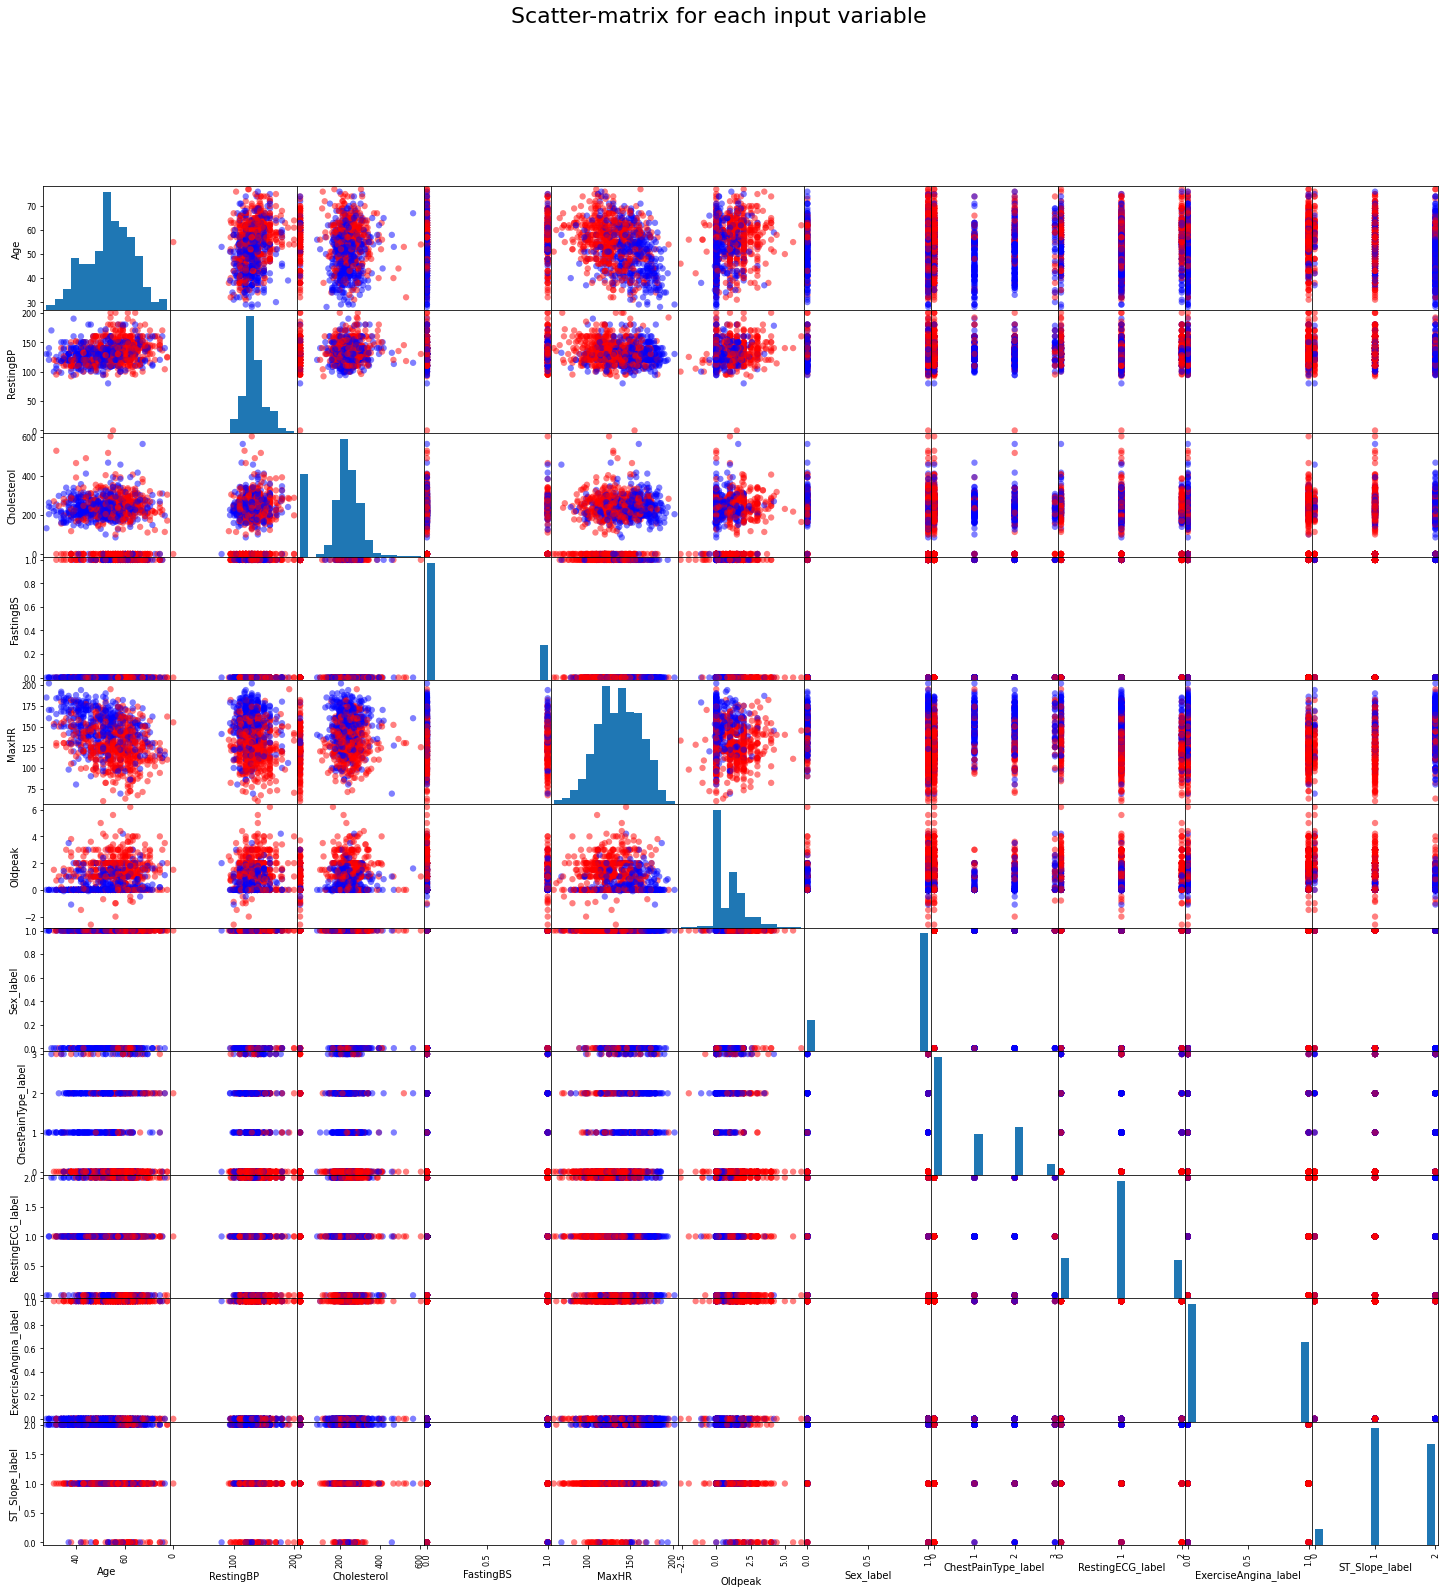

In [56]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import cm

feature_names = data_frame.columns.values.tolist()
feature_names.remove('HeartDisease')

X = data_frame[feature_names]
y = data_frame['HeartDisease']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c=['blue' if i==0 else 'red' for i in y], marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(25, 25), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable', fontsize=22)
plt.savefig('scatter_matrix')

In [57]:
data_frame.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_label,ChestPainType_label,RestingECG_label,ExerciseAngina_label,ST_Slope_label
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.789760,0.781046,0.989107,0.404139,1.361656
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.956519,0.631671,0.490992,0.607056
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.87
Accuracy of SVM classifier on test set: 0.88


In [1]:
!pipreqs /home/themn/Documents/Projects/FSusingSA

## Install requirements with this command:

`pip install -r requirements.txt`

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
chest_pain_labels = label_encoder.fit_transform(data_frame['ChestPainType'])
chest_pain_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}

chest_pain_mapping

{0: 'ASY', 1: 'ATA', 2: 'NAP', 3: 'TA'}

In [7]:
data_frame['CP_Label'] = chest_pain_labels
data_frame.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,CP_Label
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,2
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,2


In [1]:
from SA import binary_simulated_annealing

In [9]:
x = binary_simulated_annealing(11, 100, 10)

1: [1 0 1 0 0 0 0 1 1 0 1] ~~~> 6.000
2: [1 1 1 0 0 0 0 1 1 0 1] ~~~> 5.000
17: [0 1 1 1 0 1 1 0 1 1 0] ~~~> 4.000
19: [0 1 1 1 0 1 1 1 1 1 0] ~~~> 3.000
37: [0 1 1 1 1 1 1 1 1 1 0] ~~~> 2.000
39: [1 1 1 1 1 1 1 1 1 1 0] ~~~> 1.000
42: [1 1 1 1 1 1 1 1 1 1 1] ~~~> 0.000


In [3]:
print(x)

{'best_solution': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 'best_score': 0}


In [1]:
import numpy as np
import random

تولید یک آرایه باینری به طول ۱۱

In [2]:
best_solution = np.random.choice([0, 1], 11)

در اینجا به صورت موقتی تابع هدف جمع عناصر آرایه تعریف شده است

In [3]:
def objective_function(solution):
    return len(solution) - sum(solution)

نتیجه اولیه را بررسی می‌کنیم

In [4]:
print("best_solution:", best_solution,\
     "\nobjective:", objective_function(best_solution))

best_solution: [0 1 1 1 1 0 0 0 1 0 1] 
objective: 5


بهترین مقدار تابع هدف را نیز نگه می‌داریم

In [5]:
best_evalutaion = objective_function(best_solution)

در حال حاضر جواب فعلی همان مقدار اولیه است

In [6]:
current_solution, current_evaluation = best_solution, best_evalutaion

تعداد اجراها را تعیین می‌کنیم

In [7]:
n_iterations = 10

In [1]:
def test_call(arr):
    another = arr
    another[0] = 1

In [2]:
araye = [3, 4]
test_call(araye)
print(araye)

[1, 4]


In [ ]:
random_indices = np.random.sample(range(len(solution)), step)

این تابع یک کاندیدا (همسایه) تولید می‌کند

In [8]:
def generate_candidate(solution, step = 1):
    random_indices = random.sample(range(len(solution)), step)
    print("indices:", random_indices)
    for i in random_indices:
        solution[i] = 1 - solution[i]
    return solution

قطعه کد زیر صرفا برای تست است

In [9]:
csolution = [1,1,0,0,1,0]
asolution = generate_candidate(csolution.copy())
print(csolution, asolution, sep='\n')

indices: [5]
[1, 1, 0, 0, 1, 0]
[1, 1, 0, 0, 1, 1]


In [ ]:
for i in range(n_iterations):
    candidate = current_solution np.random.randint(10)

In [2]:
np.random.choice([0, 1], 8)

array([1, 1, 1, 1, 1, 0, 0, 1])

In [3]:
def simulated_annealing(n_iterations, temperature):
    best_solution = np.random.choice([0, 1], 11)

    اینجا ادامه میدم

In [4]:
    print(best_solution)

NameError: name 'best_solution' is not defined